# 1. Initializing Packages and Program Variables

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
import scipy.stats as sts

In [1]:
import sys
print(sys.path)
sys.path.remove('C:\\Users\\91878\\AppData\\Roaming\\Python\\Python38\\site-packages')

['C:\\Users\\91878\\anaconda3\\Jupyter Projects', 'C:\\Users\\91878\\anaconda3\\python38.zip', 'C:\\Users\\91878\\anaconda3\\DLLs', 'C:\\Users\\91878\\anaconda3\\lib', 'C:\\Users\\91878\\anaconda3', '', 'C:\\Users\\91878\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\91878\\anaconda3\\lib\\site-packages', 'C:\\Users\\91878\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\91878\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\91878\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\91878\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\91878\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\91878\\.ipython']


# 2. Data Loading and Cleaning

Loading the data

In [76]:
df = pd.read_csv('netflix_titles.csv')
display(df.head(5))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Cleaning the data

In [4]:
print(df.info())
df = df.fillna(value = {'director': 'Director Not Mentioned', 'cast' : 'Cast Not Available', 'country': 'Country Unavailable'})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


Adding additional columns to the Dataframe

In [78]:
dates = df['date_added']
year_added = [str(i)[-4:] for i in dates]
year_added.sort()
year_dict = Counter(year_added)
year_dict.pop('nan')
years = list(int(i) for i in year_dict.keys())
values = list(year_dict.values())
df['years'] = year_added
df['Country Type'] = df['country'].apply(lambda x: 'United States' if x == 'United States' else 'Others')
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,years,Country Type
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2008,Others
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2008,Others
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2009,Others
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2009,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2010,United States


# 3. Data Visualization

## 3A. Preliminary Data Visualization

Bar Chart of Netflix Titles added over the years 

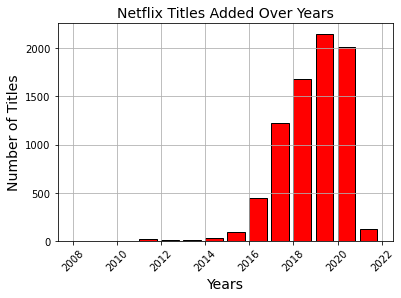

In [6]:
plt.bar(years, values, color = 'red', edgecolor = 'black',align='edge', width=0.8)
plt.title('Netflix Titles Added Over Years', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.xticks(rotation = 45)
plt.ylabel('Number of Titles', fontsize=14)
plt.grid(True)
plt.show()

KDE Plot of Movie releases over the years

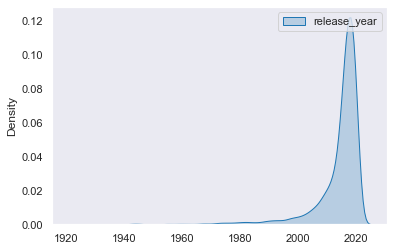

In [107]:
sns.set_style('dark')
sns.set_context('notebook')
sns.kdeplot(data = df, fill = True)
plt.show()

Side-by-side Bar Chart of US vs International titles added to Netflix over the years  

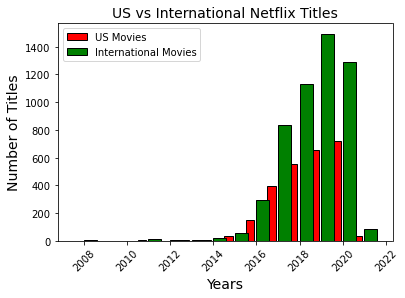

In [121]:
us_data = df[df['Country Type'] == 'United States']
other_data = df[df['Country Type'] == 'Others']
us_values = Counter(us_data['years'])
us_values.pop('nan')
other_values = Counter(other_data['years'])
other_values.pop('nan')
new_us_values = []
new_other_values = []
for i in years:
    if us_values.get(str(i), 0) == 0:
        new_us_values.append(0)
    else:
        new_us_values.append(us_values[str(i)])
    if other_values.get(str(i), 0) == 0:
        new_other_values.append(0)
    else:
        new_other_values.append(other_values[str(i)])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar([i-0.5 for i in years], new_us_values, width=0.4,color = 'red', label = "US Movies",align = 'edge', edgecolor = 'black')
ax.bar(years, new_other_values, width=0.6,color = 'green', label = "International Movies", align = 'edge', edgecolor = 'black')
plt.title('US vs International Netflix Titles', fontsize=14)
ax.set_xlabel('Years', fontsize=14)
plt.xticks(rotation = 45)
ax.set_ylabel('Number of Titles', fontsize=14)
plt.legend(loc = "best")
plt.show()


Simple countplot of total US vs Other movies in Netflix

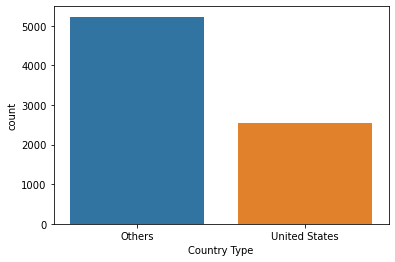

In [76]:
sns.countplot(x = df['Country Type'])
plt.show()

## 3B. Data Analysis - Visualization

Performing statistical analysis on data and look for patterns in visualizations

First, let us perform analysis and visualization on the 'Duration' and 'Release Year' columns of the data

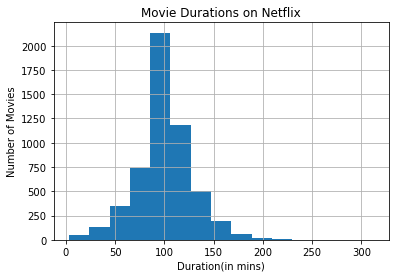

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64


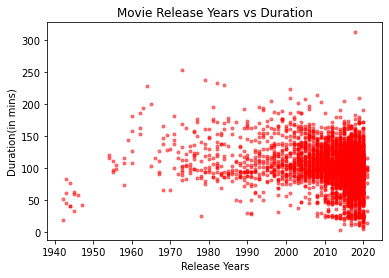

This is the Covariance Matrix: 
[[814.01115843 -56.48875917]
 [-56.48875917  93.37902024]]

Following is the Pearson Coefficient: 
-0.20489067800320127


In [120]:
plt.hist(df_movies1.duration, range = (df_movies1.duration.min(), df_movies1.duration.max()), bins = 15)
plt.xlabel('Duration(in mins)')
plt.ylabel('Number of Movies')
plt.title('Movie Durations on Netflix')
plt.grid(True)
plt.show()
print(df_movies1.duration.describe())
#The histogram and the .describe() method shows that maximum movies are between 90-100 minutes.

plt.scatter(y = df_movies1.duration, x = df_movies.release_year, color = 'red', alpha = 0.5, marker = '.')
plt.xlabel('Release Years')
plt.ylabel('Duration(in mins)')
plt.title("Movie Release Years vs Duration")
plt.show()
print("This is the Covariance Matrix: ")
print(np.cov(df_movies1.duration, df_movies.release_year))
corr, p = sts.pearsonr(df_movies1.duration, df_movies.release_year)
print("\nFollowing is the Pearson Coefficient: ")
print(corr)
#The scatterplot between Movie Duration and Release Year show no obvious correlation.
#The Pearson coefficient proves this with value almost equal to 0

Analysing and Visualizing the Release Years of movies in the data  

Following Movies Were Added To Netflix the same year they were released: 


,title,release_year,country
3,9,2009,United States
36,#Selfie,2014,Romania
46,1 Chance 2 Dance,2014,United States
55,100 Things to do Before High School,2014,United States
62,13 Cameras,2015,United States
...,...,...,...
7549,WHAT DID JACK DO?,2020,United States
7568,What We Wanted,2020,Austria
7576,Wheels of Fortune,2020,United States
7591,Whipped,2020,Indonesia


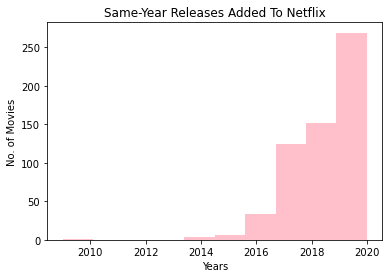

In [112]:
print("Following Movies Were Added To Netflix the same year they were released: ")
same_year_movies = df_movies1[df_movies1.years == df_movies1.release_year]
display(same_year_movies[['title', 'release_year', 'country']])
#This lists all the movies on Netflix that were added to the library the same year they were released

plt.hist(same_year_movies.release_year, color = 'pink')
plt.xlabel('Years')
plt.ylabel('No. of Movies')
plt.title('Same-Year Releases Added To Netflix')
plt.show()
#We can notice that since 2017, Netflix accelerated its acquisition of same-year movie releases. 
#This reached an even higher level in 2021, suggesting a paradigm shift due to COVID-19

# 4. Netflix Title Recommendation


This is a Netflix Title recommendation procedure that recommends Netflix movies or TV shows to users based on their preferences.

Preparing a dataset for Netflix title recommendations

In [44]:
df_movies = df[df.type == 'Movie']
df_movies1 = df_movies.copy()
df_shows = df[df.type == 'TV Show']
df_shows1 = df_shows.copy()
df_movies1.loc[df_movies1['years'] == 'nan', 'years'] = 0
df_movies1['years'] = pd.to_numeric(df_movies1['years'])
df_movies1['duration'] = pd.to_numeric(df_movies['duration'].str.split(' ', expand = True)[0])
df_shows1.loc[df_shows1['years'] == 'nan', 'years'] = 0
df_shows1['years'] = pd.to_numeric(df_shows1['years'])
df_shows1['duration'] = pd.to_numeric(df_shows['duration'].str.split(' ', expand = True)[0])
df_shows1.rename(columns = {'duration': 'seasons'}, inplace = True)



   show_id     type   title                director  \
0       s1  TV Show      3%  Director Not Mentioned   
5       s6  TV Show      46             Serdar Akar   
11     s12  TV Show    1983  Director Not Mentioned   
12     s13  TV Show    1994    Diego Enrique Osorno   
16     s17  TV Show  Feb-09  Director Not Mentioned   

                                                 cast                country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
12                                 Cast Not Available                 Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...    Country Unavailable   

           date_added  release_year rating  seasons  \
0     August 14, 2020          2020  TV-MA        4   
5        July 1, 2017          2016  TV-MA        1   
11  November 30, 2018  

Initializing the input parameters for the recommendation:

In [98]:
movie_or_tv = int(input("Enter 0 for movies or 1 for TV shows: "))
if movie_or_tv == 0:
    fav_actor = input("Enter string for your favorite actor, or 'None': ")
    duration = int(input("Enter preferred movie duration (in minutes): "))
else:
    seasons = int(input("Enter preferred number of seaons: "))

recent_or_not = int(input("Enter 0 if you want recently released titles, 1 otherwise: "))
genre = input("Enter your preferred genre, or 'None': ")
new_on_netflix = int(input("Enter 0 if you want titles recently added on Netflix, 1 otherwise: "))
us_or_others = int(input("Enter 0 for titles from the United Stated, 1 for titles from other countries: "))

Enter 0 for movies or 1 for TV shows: 0
Enter string for your favorite actor, or 'None': Chris Evans
Enter preferred movie duration (in minutes): 120
Enter 0 if you want recently released titles, 1 otherwise: 1
Enter your preferred genre, or 'None': Action
Enter 0 if you want titles recently added on Netflix, 1 otherwise: 1
Enter 0 for titles from the United Stated, 1 for titles from other countries: 0


Creating method for movie recommendations:

In [99]:
def movie_recommendations(df_movies1, fav_actor, duration, recent_or_not, genre, new_on_netflix, us_or_others):
    df_movies1['weight1'] = df_movies1.apply(lambda x: 1 if fav_actor in x['cast'] else 0, axis = 1)
    df_movies1['weight2'] = df_movies1.apply(lambda x: 1 if recent_or_not == 0 and x['release_year'] >= 2020 else 0, axis = 1)
    df_movies1['weight3'] = df_movies1.apply(lambda x: 1 if genre in x['listed_in'] else 0, axis = 1)
    df_movies1['weight4'] = df_movies1.apply(lambda x: 1 if new_on_netflix == 0 and x['years'] >= 2020 else 0, axis = 1)
    df_movies1['weight5'] = df_movies1.apply(lambda x: 1 if (us_or_others == 0 and x['Country Type'] == 'United States') or (us_or_others == 1 and x['Country Type'] == 'Others') else 0, axis = 1)
    df_movies1['weight6'] = df_movies1.apply(lambda x: 1 if x['duration'] < duration-10 or x['duration'] > duration+10 else 0, axis = 1)
    df_movies1['weight'] = df_movies1['weight1'] + df_movies1['weight2'] + df_movies1['weight3'] + df_movies1['weight4'] + df_movies1['weight5']+ df_movies1['weight6']
    df_movies1.drop(columns = ['weight1','weight2','weight3','weight4','weight5', 'weight6'], inplace = True)
    df_movies1 = df_movies1.sort_values(by = ['weight'], ascending = False)
    print('Your Top 5 Movie Recommendations Are: \n')
    display(df_movies1.head()[['show_id','title','director','cast','country','release_year','date_added','duration','listed_in']])
    


Creating method for tv recommendations: 

In [100]:
def tv_recommendation(df_shows1, seasons, recent_or_not, genre, new_on_netflix, us_or_others):
    
    df_shows1['weight1'] = df_shows1.apply(lambda x: 1 if x['seasons'] == seasons else 0, axis = 1)
    df_shows1['weight2'] = df_shows1.apply(lambda x: 1 if recent_or_not == 0 and x['release_year'] >= 2020 else 0, axis = 1)
    df_shows1['weight3'] = df_shows1.apply(lambda x: 1 if genre in x['listed_in'] else 0, axis = 1)
    df_shows1['weight4'] = df_shows1.apply(lambda x: 1 if new_on_netflix == 0 and x['years'] >= 2020 else 0, axis = 1)
    df_shows1['weight5'] = df_shows1.apply(lambda x: 1 if (us_or_others == 0 and x['Country Type'] == 'United States') or (us_or_others == 1 and x['Country Type'] == 'Others') else 0, axis = 1)
    df_shows1['weight'] = df_shows1['weight1'] + df_shows1['weight2'] + df_shows1['weight3'] + df_shows1['weight4'] + df_shows1['weight5']#+ df_shows1['weight6']
    df_shows1.drop(columns = ['weight1','weight2','weight3','weight4','weight5'], inplace = True)
    df_shows1 = df_shows1.sort_values(by = ['weight'], ascending = False)
    print('Your Top 5 TV Show Recommendations Are: \n')
    display(df_shows1.head()[['show_id', 'title', 'cast','country','release_year','date_added','seasons','listed_in']])


Generating title recommendations:

In [102]:
if movie_or_tv == 0:
    movie_recommendations(df_movies1, fav_actor, duration, recent_or_not, genre, new_on_netflix, us_or_others)
else:
    tv_recommendation(df_shows1, seasons, recent_or_not, genre, new_on_netflix, us_or_others)
print("Thank you for playing!!")    

Your Top 5 Movie Recommendations Are: 



,show_id,title,director,cast,country,release_year,date_added,duration,listed_in
635,s636,Avengers: Infinity War,"Anthony Russo, Joe Russo","Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",United States,2018,"December 25, 2018",150,"Action & Adventure, Sci-Fi & Fantasy"
5699,s5700,Solo: A Star Wars Story (Spanish Version),Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,2018,"January 9, 2019",135,"Action & Adventure, Children & Family Movies, ..."
1414,s1415,Cleopatra Jones,Jack Starrett,"Tamara Dobson, Bernie Casey, BrendaSykes, Esth...",United States,1973,"November 1, 2019",89,"Action & Adventure, Classic Movies"
6199,s6200,The Car: Road to Revenge,G.J. Echternkamp,"Grant Bowler, Kathleen Munroe, Martin Hancock,...",United States,2019,"February 1, 2020",89,"Action & Adventure, Horror Movies, Sci-Fi & Fa..."
5209,s5210,Rim of the World,McG,"Jack Gore, Miya Cech, Benjamin Flores Jr., Ale...",United States,2019,"May 24, 2019",99,"Action & Adventure, Independent Movies, Sci-Fi..."


Thank you for playing!!
